In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
from scipy.stats import linregress
import gmaps
from scipy.stats import linregress
from matplotlib import pyplot as plt



# my imports
from urllib.parse import urlencode
import random
import logging
import csv

In [2]:
# !jupyter nbextension enable --py --sys-prefix widgetsnbextension
# !pip install gmaps
# !jupyter nbextension enable --py --sys-prefix gmaps

In [3]:
# File locations:
# uscities = "Resources/uscities.csv"
cdc_data = "Resources/BRFSS__Table_of_Overweight_and_Obesity__BMI_.csv"
output_data_file = "Resources/df.csv"
output_png_filePath = 'Output_Data/'

In [4]:
cdc_df = pd.read_csv(cdc_data)
cdc_df.head(3)

,Year,Locationabbr,Locationdesc,Class,Topic,Question,Response,Break_Out,Break_Out_Category,Sample_Size,...,Data_Value_Footnote,DataSource,ClassId,TopicId,LocationID,BreakoutID,BreakOutCategoryID,QuestionID,ResponseID,GeoLocation
0,2019,AK,Alaska,Overweight and Obesity (BMI),BMI Categories,Weight classification by Body Mass Index (BMI)...,Overweight (BMI 25.0-29.9),"Black, non-Hispanic",Race/Ethnicity,22,...,Prevalence estimate not available if the unwei...,BRFSS,CLASS14,TOPIC09,2,RACE02,CAT4,_BMI5CAT,RESP040,"(64.84507995700051, -147.72205903599973)"
1,2019,AK,Alaska,Overweight and Obesity (BMI),BMI Categories,Weight classification by Body Mass Index (BMI)...,Underweight (BMI 12.0-18.4),"Multiracial, non-Hispanic",Race/Ethnicity,2,...,Prevalence estimate not available if the unwei...,BRFSS,CLASS14,TOPIC09,2,RACE07,CAT4,_BMI5CAT,RESP042,"(64.84507995700051, -147.72205903599973)"
2,2019,AK,Alaska,Overweight and Obesity (BMI),BMI Categories,Weight classification by Body Mass Index (BMI)...,Obese (BMI 30.0 - 99.8),H.S. or G.E.D.,Education Attained,239,...,NaN,BRFSS,CLASS14,TOPIC09,2,EDUCA2,CAT5,_BMI5CAT,RESP039,"(64.84507995700051, -147.72205903599973)"


In [5]:
# Get the weight group categories and Lat Lng
cdc_df['Weight_Class'] = cdc_df.loc[:,'Response'].apply(lambda x: x.split()[0])
cdc_df['Lat'] = cdc_df.loc[:,'GeoLocation'].astype(str).apply(lambda x: x.strip(')(').split(',')[0])
cdc_df['Lng'] = cdc_df.loc[:,'GeoLocation'].astype(str).apply(lambda x: x.strip(')(').split(',')[-1]).str.strip()
cdc_df['Sample_Size'] = cdc_df['Sample_Size'].str.replace(",","").astype(float)
cdc_df.head(3)


,Year,Locationabbr,Locationdesc,Class,Topic,Question,Response,Break_Out,Break_Out_Category,Sample_Size,...,TopicId,LocationID,BreakoutID,BreakOutCategoryID,QuestionID,ResponseID,GeoLocation,Weight_Class,Lat,Lng
0,2019,AK,Alaska,Overweight and Obesity (BMI),BMI Categories,Weight classification by Body Mass Index (BMI)...,Overweight (BMI 25.0-29.9),"Black, non-Hispanic",Race/Ethnicity,22.0,...,TOPIC09,2,RACE02,CAT4,_BMI5CAT,RESP040,"(64.84507995700051, -147.72205903599973)",Overweight,64.84507995700051,-147.72205903599973
1,2019,AK,Alaska,Overweight and Obesity (BMI),BMI Categories,Weight classification by Body Mass Index (BMI)...,Underweight (BMI 12.0-18.4),"Multiracial, non-Hispanic",Race/Ethnicity,2.0,...,TOPIC09,2,RACE07,CAT4,_BMI5CAT,RESP042,"(64.84507995700051, -147.72205903599973)",Underweight,64.84507995700051,-147.72205903599973
2,2019,AK,Alaska,Overweight and Obesity (BMI),BMI Categories,Weight classification by Body Mass Index (BMI)...,Obese (BMI 30.0 - 99.8),H.S. or G.E.D.,Education Attained,239.0,...,TOPIC09,2,EDUCA2,CAT5,_BMI5CAT,RESP039,"(64.84507995700051, -147.72205903599973)",Obese,64.84507995700051,-147.72205903599973


In [6]:
columns = ['Year','Locationdesc','Break_Out','Sample_Size','Break_Out_Category','Lat','Lng','Weight_Class']


In [7]:
df = cdc_df[columns].copy()
df.head(5)
df.to_csv(output_data_file, index=False)


In [8]:
df.head(3)

,Year,Locationdesc,Break_Out,Sample_Size,Break_Out_Category,Lat,Lng,Weight_Class
0,2019,Alaska,"Black, non-Hispanic",22.0,Race/Ethnicity,64.84507995700051,-147.72205903599973,Overweight
1,2019,Alaska,"Multiracial, non-Hispanic",2.0,Race/Ethnicity,64.84507995700051,-147.72205903599973,Underweight
2,2019,Alaska,H.S. or G.E.D.,239.0,Education Attained,64.84507995700051,-147.72205903599973,Obese


In [9]:
len(df)


47074

In [10]:
rename_columns = {'Locationdesc': 'State', 'Break_Out':'Demography', 'Break_Out_Category': 'Categories'}

In [11]:
df = df.rename(columns=rename_columns)
df.head(3)

,Year,State,Demography,Sample_Size,Categories,Lat,Lng,Weight_Class
0,2019,Alaska,"Black, non-Hispanic",22.0,Race/Ethnicity,64.84507995700051,-147.72205903599973,Overweight
1,2019,Alaska,"Multiracial, non-Hispanic",2.0,Race/Ethnicity,64.84507995700051,-147.72205903599973,Underweight
2,2019,Alaska,H.S. or G.E.D.,239.0,Education Attained,64.84507995700051,-147.72205903599973,Obese


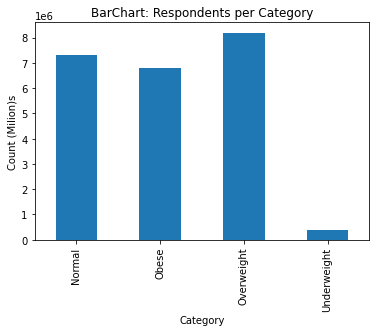

In [26]:
# Fig 1. Plot a chart of WeightClass by Total Counts / class
category = df.groupby(['Weight_Class'])
p = category['Sample_Size'].sum()
p.plot.bar(xlabel="Category", ylabel="Count (Milion)s", title='BarChart: Respondents per Category')
plt.savefig(f'{output_png_filePath}/countVsweight.png')


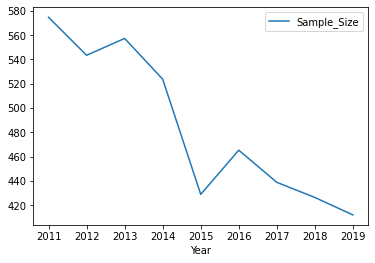

In [202]:
year = df.groupby(['Year']).mean()
year.plot.line()
plt.savefig(f'{output_png_filePath}/SampleSize.png')

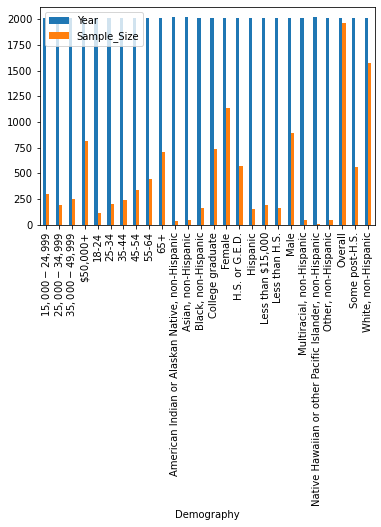

In [203]:
demo = df.groupby(['Demography']).mean()
demo.plot.bar()
plt.savefig(f'{output_png_filePath}/demography.png')

In [192]:
df['Year'].value_counts()

2016    5624
2015    5520
2018    5520
2017    5520
2019    5416
2013    4884
2011    4884
2012    4856
2014    4850
Name: Year, dtype: int64

In [195]:
ps = df.groupby('Year')

In [201]:
ps['State'].count()

Year
2011    4884
2012    4856
2013    4884
2014    4850
2015    5520
2016    5624
2017    5520
2018    5520
2019    5416
Name: State, dtype: int64

In [176]:
t = df.groupby('Demography')
rx = pd.DataFrame(t['Weight_Class'].value_counts())

In [184]:
t['Weight_Class'].count()

Demography
$15,000-$24,999                                            1908
$25,000-$34,999                                            1908
$35,000-$49,999                                            1908
$50,000+                                                   1908
18-24                                                      1908
25-34                                                      1908
35-44                                                      1908
45-54                                                      1908
55-64                                                      1908
65+                                                        1908
American Indian or Alaskan Native, non-Hispanic            1060
Asian, non-Hispanic                                        1060
Black, non-Hispanic                                        1887
College graduate                                           1908
Female                                                     1908
H.S. or G.E.D.               

In [154]:
list(demo.index)

['$15,000-$24,999',
 '$25,000-$34,999',
 '$35,000-$49,999',
 '$50,000+',
 '18-24',
 '25-34',
 '35-44',
 '45-54',
 '55-64',
 '65+',
 'American Indian or Alaskan Native, non-Hispanic',
 'Asian, non-Hispanic',
 'Black, non-Hispanic',
 'College graduate',
 'Female',
 'H.S. or G.E.D.',
 'Hispanic',
 'Less than $15,000',
 'Less than H.S.',
 'Male',
 'Multiracial, non-Hispanic',
 'Native Hawaiian or other Pacific Islander, non-Hispanic',
 'Other, non-Hispanic',
 'Overall',
 'Some post-H.S.',
 'White, non-Hispanic']

In [ ]:
r = ['American Indian or Alaskan Native, non-Hispanic',
       'Black, non-Hispanic', 'College graduate', 'Female', 'H.S. or G.E.D.',
       'Hispanic', 'Less than $15,000', 'Less than H.S.', 'Male',
       'Multiracial, non-Hispanic',
       'Native Hawaiian or other Pacific Islander, non-Hispanic',
       'Other, non-Hispanic', 'Overall', 'Some post-H.S.',
       'White, non-Hispanic'],

In [159]:
demo.index.drop(['r'])

KeyError: "['r'] not found in axis"

In [209]:
locations = random.choices(loc, k=2000)
location = df[['Lat', 'Lng']]
weights = df['Weight_Class']



# location = df[['Lat', 'Lng']].astype(float)
# loc = location[['Lat', 'Lng']].values.tolist()
# locations = random.choices(loc, k=2000)
# weights = df['weights']
# fig = gmaps.figure()
# weights_layer = gmaps.symbol_layer(locations, fill_color='rgba(0, 150, 0, 0.4)',
#                                    stroke_color='rgba(0, 0, 150, 0.4)', scale=2)

# fig.add_layer(weights_layer)

# fig

In [223]:
df.groupby(['State']).sum()

,Year,Sample_Size
State,,
Alabama,1789440,367214.0
Alaska,1785414,179247.0
All States and DC (median) **,72540,1832.0
"All States, DC and Territories (median) **",72540,1908.0
Arizona,1789440,454879.0
Arkansas,1785414,254982.0
California,1789440,597022.0
Colorado,1789440,597069.0
Connecticut,1787426,453154.0


In [224]:
df.loc[df['State'] == 'All States and DC (median) **']

,Year,State,Demography,Sample_Size,Categories,Lat,Lng,Weight_Class
4788,2019,All States and DC (median) **,Overall,50.0,Overall,nan,nan,Overweight
4789,2019,All States and DC (median) **,Overall,50.0,Overall,nan,nan,Normal
4790,2019,All States and DC (median) **,Overall,50.0,Overall,nan,nan,Underweight
4791,2019,All States and DC (median) **,Overall,50.0,Overall,nan,nan,Obese
10308,2018,All States and DC (median) **,Overall,51.0,Overall,nan,nan,Obese
10309,2018,All States and DC (median) **,Overall,51.0,Overall,nan,nan,Underweight
10310,2018,All States and DC (median) **,Overall,51.0,Overall,nan,nan,Overweight
10311,2018,All States and DC (median) **,Overall,51.0,Overall,nan,nan,Normal
15828,2017,All States and DC (median) **,Overall,51.0,Overall,nan,nan,Underweight
15829,2017,All States and DC (median) **,Overall,51.0,Overall,nan,nan,Overweight


In [170]:
# label = []
# for i in trend.index:
#     if i[0] not in label:
#         label.append(i[0])
        
# label2 = []
# for i in trend.index:
#     if i[1] not in label2:
#         label2.append(i[1])

In [118]:
# pivot_df = df.pivot(index='Year', columns='Weight_Class', values='Sample_Size')
# pivot_df

The pivot function takes arguments of index (what you want on the x-axis), columns (what you want as the layers in the stack), and values (the value to use as the height of each layer). Note that there needs to be a unique combination of your index and column values for each number in the values column in order for this to work.

In [201]:
# Came back to this to plot graph of trend data
trend.head(5)

Sample_Size
Year Weight_Class             
2011 Normal         782.583948
     Obese          641.706798
     Overweight     834.868960
     Underweight     39.381654
2012 Normal         727.908942

In [ ]:



# location = df[['Lat', 'Lng']].astype(float)
# loc = location[['Lat', 'Lng']].values.tolist()
# locations = random.choices(loc, k=2000)
# weights = df['weights']
# fig = gmaps.figure()
# weights_layer = gmaps.symbol_layer(locations, fill_color='rgba(0, 150, 0, 0.4)',
#                                    stroke_color='rgba(0, 0, 150, 0.4)', scale=2)

# fig.add_layer(weights_layer)

# fig

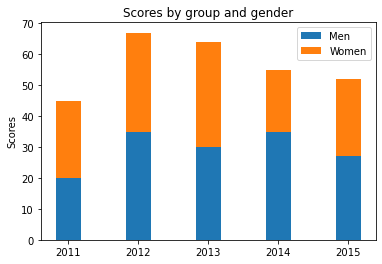

In [178]:
# Stacked Barchat

labels = ['2011', '2012', '2013', '2014', '2015']
men_means = [20, 35, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
men_std = [2, 3, 4, 1, 2]
women_std = [3, 5, 2, 3, 3]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, men_means, width, label='Men')
ax.bar(labels, women_means, width, bottom=men_means,
       label='Women')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()

In [ ]:
# Generate a facet plot of all 3 figures
# Trend line
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle("Crime Rates Over Time", fontsize=16, fontweight="bold")

ax1.set_xlim(min(year), max(year))
ax1.plot(year, violent_crime_rate, linewidth=1, marker="o")
ax1.plot(year, vc_fit, "b--", linewidth=1)
ax1.set_ylabel("Violent Crime Rate")

ax2.plot(year, murder_rate, linewidth=1, marker="o", color="r")
ax2.plot(year, m_fit, "r--", linewidth=1)
ax2.set_ylabel("Murder Rate")

ax3.plot(year, aggravated_assault_rate, linewidth=1, marker="o", color="g")
ax3.plot(year, aa_fit, "g--", linewidth=1)
ax3.set_ylabel("Aggravated Assault Rate")
ax3.set_xlabel("Year")

In [ ]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# Get x and y axis
x_axis = total_no.index
y_axis = total_no


# tick locations:
tick_locations = []
for x in x_axis:
    tick_locations.append(x)


    
# label and title chart
plt.title("No Of Measurements per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Measurements")


# plt.xticks(tick_locations, DF, rotation="vertical"
plt.bar(x_axis, y_axis, alpha=0.75, align="center")
plt.xticks(tick_locations, x_axis, rotation="vertical")
plt.figure(figsize=(10,5))
plt.show()


In [53]:
# Average count by category grouping
df.groupby(['Categories','Weight_Class']).sum()

Year  Sample_Size
Categories         Weight_Class                      
Age Group          Normal        5766912    1254380.0
                   Obese         5766912    1158757.0
                   Overweight    5766912    1398737.0
                   Underweight   5766912      66147.0
Education Attained Normal        3844608    1251478.0
                   Obese         3844608    1156924.0
                   Overweight    3844608    1395890.0
                   Underweight   3842594      65939.0
Gender             Normal        1922304    1254299.0
                   Obese         1922304    1158688.0
                   Overweight    1922304    1398653.0
                   Underweight   1922304      66138.0
Household Income   Normal        4805760    1051322.0
                   Obese         4805760    1021281.0
                   Overweight    4805760    1212289.0
                   Underweight   4805760      52108.0
Overall            Normal         997422    1255315.0
                   Obese          997422    1159692.0
                   Overweight     997422    1399672.0
                   Underweight    997422      67082.0
Race/Ethnicity     Normal        6405242    1246364.0
                   Obese         6405240    1152269.0
                   Overweight    6403226    1389881.0
                   Underweight   6300558      65655.0

In [19]:
df.groupby('Locationdesc').mean().head(3)


,Year,Sample_Size
Locationdesc,,
Alabama,2015.135135,413.529279
Alaska,2015.139955,202.310384
All States and DC (median) **,2015.000000,50.888889


In [21]:
df.groupby('Break_Out_Category').mean()


,Year,Sample_Size
Break_Out_Category,,
Age Group,2014.993711,338.750961
Education Attained,2014.993841,507.172192
Gender,2014.993711,1016.189203
Household Income,2014.993711,349.790356
Overall,2014.993939,1960.485354
Race/Ethnicity,2015.504068,304.460779


In [22]:
df.head(3)


,Year,Locationdesc,Break_Out,Sample_Size,Break_Out_Category,Lat,Lng,Weight_Class
0,2019,Alaska,"Black, non-Hispanic",22.0,Race/Ethnicity,64.84507995700051,-147.72205903599973,Overweight
1,2019,Alaska,"Multiracial, non-Hispanic",2.0,Race/Ethnicity,64.84507995700051,-147.72205903599973,Underweight
2,2019,Alaska,H.S. or G.E.D.,239.0,Education Attained,64.84507995700051,-147.72205903599973,Obese


In [41]:
df.groupby(['Break_Out_Category']).mean()

,Year,Sample_Size
Break_Out_Category,,
Age Group,2014.993711,338.750961
Education Attained,2014.993841,507.172192
Gender,2014.993711,1016.189203
Household Income,2014.993711,349.790356
Overall,2014.993939,1960.485354
Race/Ethnicity,2015.504068,304.460779


In [ ]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# Get x and y axis
x_axis = total_no.index
y_axis = total_no


# tick locations:
tick_locations = []
for x in x_axis:
    tick_locations.append(x)


    
# label and title chart
plt.title("No Of Measurements per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Measurements")


# plt.xticks(tick_locations, DF, rotation="vertical"
plt.bar(x_axis, y_axis, alpha=0.75, align="center")
plt.xticks(tick_locations, x_axis, rotation="vertical")
plt.figure(figsize=(10,5))
plt.show()


In [35]:
df.groupby(['Break_Out_Category','Weight_Class']).mean()['Sample_Size']

Break_Out_Category  Weight_Class
Age Group           Normal           438.287911
                    Obese            404.876660
                    Overweight       488.727114
                    Underweight       23.112159
Education Attained  Normal           655.910901
                    Obese            606.354298
                    Overweight       731.598532
                    Underweight       34.577347
Gender              Normal          1314.778826
                    Obese           1214.557652
                    Overweight      1466.093291
                    Underweight       69.327044
Household Income    Normal           440.805870
                    Obese            428.210063
                    Overweight       508.297275
                    Underweight       21.848218
Overall             Normal          2535.989899
                    Obese           2342.812121
                    Overweight      2827.620202
                    Underweight      135.519192
Race/Et

In [20]:
df.astype({'GeoLocation': 'str'}).dtypes


Year                   int64
Locationdesc          object
Break_Out             object
Sample_Size           object
Break_Out_Category    object
weights               object
GeoLocation           object
dtype: object

In [36]:
df['Number of Respondents'] = pd.to_numeric(reduced_obesity_df['Number of Respondents'])
reduced_obesity_df.info()

IndexError: list index out of range

In [38]:
cdc_df.loc[:,'GeoLocation'].astype(str).apply(lambda x: x.strip(')(').split(',')[0])


0        64.84507995700051
1        64.84507995700051
2        64.84507995700051
3        64.84507995700051
4        64.84507995700051
               ...        
47069         43.235541343
47070         43.235541343
47071         43.235541343
47072         43.235541343
47073         43.235541343
Name: GeoLocation, Length: 47074, dtype: object

In [73]:
cdc_df['GeoLocation'].astype(str).apply(lambda x: x.strip(')(,').split(',')[-1]).str.strip()[0]


'-147.72205903599973'

In [27]:
df.head(4)

,Year,Locationdesc,Break_Out,Sample_Size,Break_Out_Category,weights,GeoLocation,Lat,Lng
0,2019,Alaska,"Black, non-Hispanic",22,Race/Ethnicity,Overweight,"(64.84507995700051, -147.72205903599973)",64.84507995700051,-147.72205903599973
1,2019,Alaska,"Multiracial, non-Hispanic",2,Race/Ethnicity,Underweight,"(64.84507995700051, -147.72205903599973)",64.84507995700051,-147.72205903599973
2,2019,Alaska,H.S. or G.E.D.,239,Education Attained,Obese,"(64.84507995700051, -147.72205903599973)",64.84507995700051,-147.72205903599973
3,2019,Alaska,35-44,151,Age Group,Overweight,"(64.84507995700051, -147.72205903599973)",64.84507995700051,-147.72205903599973


In [22]:
df.head(3)


,Year,Locationdesc,Break_Out,Sample_Size,Break_Out_Category,weights,GeoLocation
0,2019,Alaska,"Black, non-Hispanic",22,Race/Ethnicity,Overweight,"(64.84507995700051, -147.72205903599973)"
1,2019,Alaska,"Multiracial, non-Hispanic",2,Race/Ethnicity,Underweight,"(64.84507995700051, -147.72205903599973)"
2,2019,Alaska,H.S. or G.E.D.,239,Education Attained,Obese,"(64.84507995700051, -147.72205903599973)"


In [56]:


location = df[['Lat', 'Lng']].astype(float)
loc = location[['Lat', 'Lng']].values.tolist()
locations = random.choices(loc, k=2000)
weights = df['weights']
fig = gmaps.figure()
weights_layer = gmaps.symbol_layer(locations, fill_color='rgba(0, 150, 0, 0.4)',
                                   stroke_color='rgba(0, 0, 150, 0.4)', scale=2)

fig.add_layer(weights_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [54]:
cdcObe['Sample_Size'][0:50]

0      22
1       2
2     239
3     151
4      95
5     261
6      49
7      48
8       5
9      19
10     17
11     85
12     14
13    406
14    987
15     34
16     93
17     23
18      7
19      2
20     25
21     96
22     17
23     98
24    426
25    261
26     99
27     43
28      1
29    433
30    107
31     42
32    552
33    135
34      4
35    582
36     16
37    408
38    859
39     35
40     57
41      0
42     55
43    151
44      2
45    258
46    283
47      5
48    358
49    353
Name: Sample_Size, dtype: object

In [64]:
columns = ['Year','Locationabbr','Response','Break_Out_Category','GeoLocation','Sample_Size']

DF = cdcObe[columns]
#columns].groupby(['Locationabbr'])

## CDC Obesity Data

In [99]:
DF.loc[DF['Response'] == 'Overweight (BMI 25.0-29.9)']

,Year,Locationabbr,Response,Break_Out_Category,GeoLocation,Sample_Size
0,2019,AK,Overweight (BMI 25.0-29.9),Race/Ethnicity,"(64.84507995700051, -147.72205903599973)",22
3,2019,AK,Overweight (BMI 25.0-29.9),Age Group,"(64.84507995700051, -147.72205903599973)",151
6,2019,AK,Overweight (BMI 25.0-29.9),Household Income,"(64.84507995700051, -147.72205903599973)",49
9,2019,AK,Overweight (BMI 25.0-29.9),Race/Ethnicity,"(64.84507995700051, -147.72205903599973)",19
14,2019,AK,Overweight (BMI 25.0-29.9),Overall,"(64.84507995700051, -147.72205903599973)",987
...,...,...,...,...,...,...
47055,2011,WY,Overweight (BMI 25.0-29.9),Household Income,"(43.235541343, -108.109830353)",154
47059,2011,WY,Overweight (BMI 25.0-29.9),Household Income,"(43.235541343, -108.109830353)",316
47063,2011,WY,Overweight (BMI 25.0-29.9),Household Income,"(43.235541343, -108.109830353)",244
47067,2011,WY,Overweight (BMI 25.0-29.9),Household Income,"(43.235541343, -108.109830353)",326


In [2]:
cdcObe[['Break_Out','Break_Out_Category','GeoLocation']]

NameError: name 'cdcObe' is not defined

In [ ]:
columns = ['Locationabbr','','']

In [1]:
cdcObe

NameError: name 'cdcObe' is not defined

## CDC Obesity And Nutrition Data

In [13]:
cdcNut.head()

,Year,Quarter,LocationAbbr,LocationDesc,HealthTopic,PolicyTopic,DataSource,Setting,Title,Status,...,Comments,EnactedDate,EffectiveDate,GeoLocation,DisplayOrder,PolicyTypeID,HealthTopicID,PolicyTopicID,SettingID,ProvisionID
0,2010,1,NY,New York,Obesity,Incentives,DNPAO,Community,State Fiscal Plan,Dead,...,(Abstract - Enacts into law major components o...,NaN,NaN,"(42.827001032, -75.543970427)",38,LEG,002OB,029INC,002COM,1641
1,2011,1,WV,West Virginia,Nutrition,Appropriations,DNPAO,Community,Sales Tax on Food,Dead,...,(Abstract - Eliminates the sales tax on food e...,NaN,NaN,"(38.665510202, -80.712640135)",2,LEG,001NUT,002APP,002COM,4781
2,2011,1,MA,Massachusetts,Physical Activity,Built Environment and Street-Scale Design,DNPAO,Community,Pedestrian Safety,Dead,...,"(Abstract - Relates to pedestrian safety. ),...",NaN,NaN,"(42.27687047, -72.082690675)",68,LEG,003PA,049BED,002COM,4090
3,2010,1,NC,North Carolina,Obesity,Menu Labeling,DNPAO,Community,Governors Budget,Dead,...,"(Abstract - Concerns governors budget. ), (Bil...",NaN,NaN,"(35.466220975, -79.159250463)",41,LEG,002OB,032MNL,002COM,2908
4,2011,1,FL,Florida,Physical Activity,"Parks, Recreation and Trails",DNPAO,School/After School,Chronic Diseases<br>,Dead,...,"(Abstract - ""Creates the chronic disease preve...",01/01/2012 12:00:00 AM,NaN,"(28.932040377, -81.928960539)",59,LEG,003PA,034PRT,004SAS,5615
